<a href="https://colab.research.google.com/github/id12026/Deep-Learning_Perceptron/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron -

1.   Binary Classification by taking a new dataset
2.   Implement logic gates






In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv("/content/student_exam_data.csv")

# Preprocessing the Data

In [55]:
data.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [58]:
data.isnull().sum()

,0
Study Hours,0
Previous Exam Score,0
Pass/Fail,0


In [59]:
data.count()

,0
Study Hours,500
Previous Exam Score,500
Pass/Fail,500


# Exploratory Data Analysis (EDA)

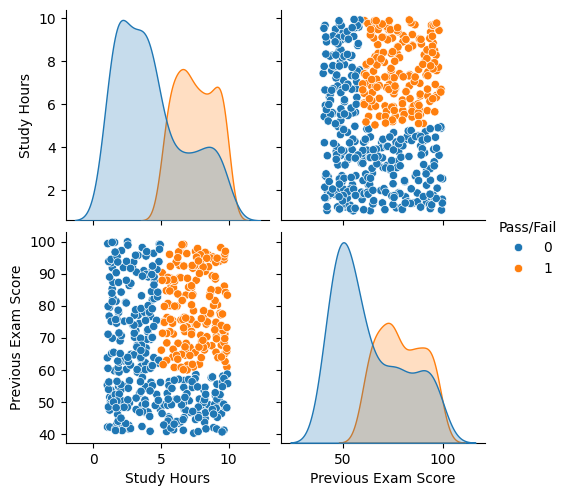

In [60]:
sns.pairplot(data, hue='Pass/Fail', diag_kind='kde')
plt.show()

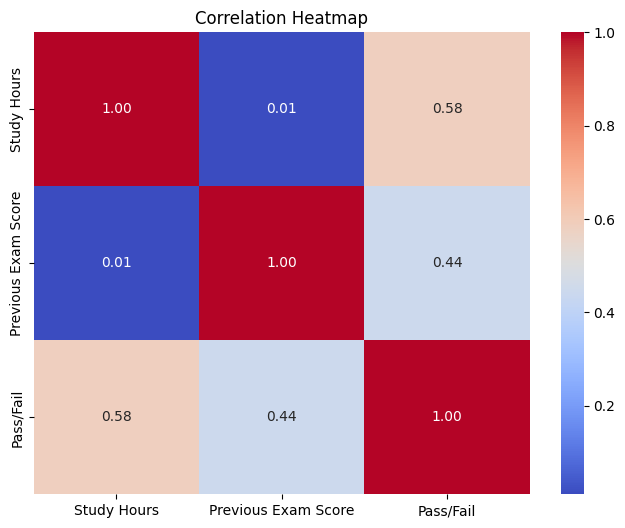

In [61]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-62-5b3f8d29e840>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pass/Fail', data=data, palette='coolwarm')


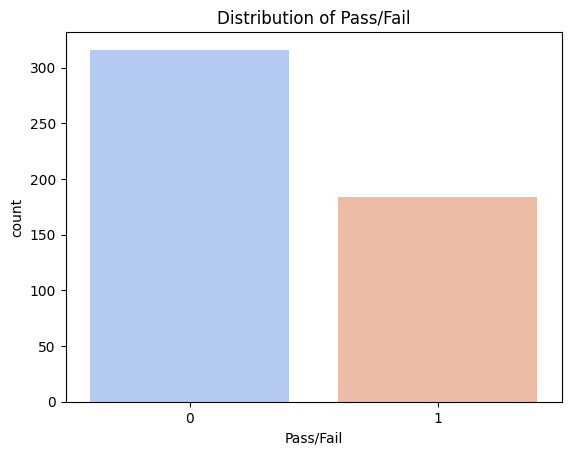

In [62]:
# Count plot for the target variable
sns.countplot(x='Pass/Fail', data=data, palette='coolwarm')
plt.title("Distribution of Pass/Fail")
plt.show()

In [63]:
if data.isnull().sum().any():
    data = data.dropna()

In [64]:
data.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [65]:
# Feature scaling (standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Study Hours', 'Previous Exam Score']] = scaler.fit_transform(
    data[['Study Hours', 'Previous Exam Score']]
)

In [66]:
# Step 3: Prepare Data for Training
X = data[['Study Hours', 'Previous Exam Score']].values
y = data['Pass/Fail'].values

print("\nTransformed Data Sample:")
print(data.head())


Transformed Data Sample:
   Study Hours  Previous Exam Score  Pass/Fail
0    -0.415636             0.758080          0
1     1.515310             0.189844          1
2     0.782307            -0.604555          0
3     0.335457             1.163515          1
4    -1.147973             0.710990          0


# Defining the Perceptron Class

In [67]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

# Initializing and training the Perceptron

In [68]:
# Initialize and train the Perceptron
perceptron = Perceptron(learning_rate=0.1, n_iter=10)
perceptron.fit(X, y)

In [69]:
# Visualization function for datasets
def plot_decision_boundary(X, y, model, title):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    predictions = model.predict(grid)
    predictions = predictions.reshape(xx1.shape)
    plt.contourf(xx1, xx2, predictions, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel('Study Hours')
    plt.ylabel('Previous Exam Score')
    plt.show()

Decision Boundary

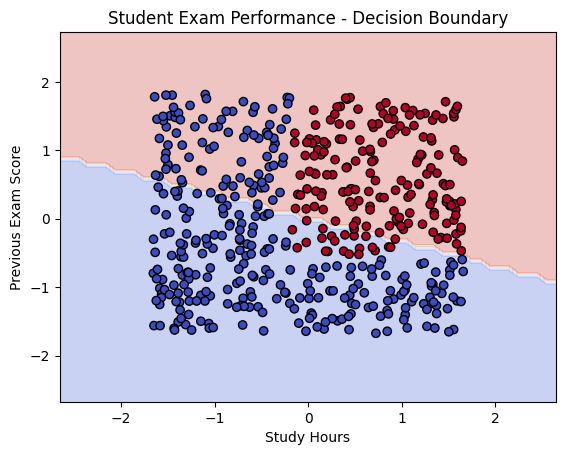

In [71]:
# Extract features and labels
X = data[['Study Hours', 'Previous Exam Score']].values
y = data['Pass/Fail'].values

# Train Perceptron
perceptron = Perceptron(learning_rate=0.1, n_iter=100)
perceptron.fit(X, y)

# Predict and visualize
predictions = perceptron.predict(X)
plot_decision_boundary(X, y, perceptron, "Student Exam Performance - Decision Boundary")


# Report

In [76]:
# Print classification report
print("Classification Report:")
print(classification_report(y, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       316
           1       0.65      0.89      0.75       184

    accuracy                           0.79       500
   macro avg       0.79      0.81      0.78       500
weighted avg       0.82      0.79      0.79       500



# Logic Gates

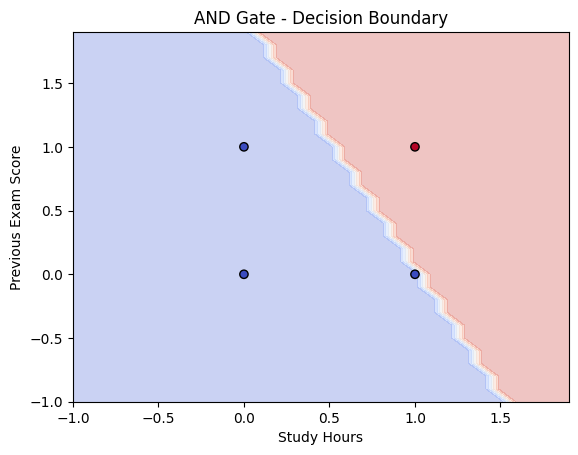

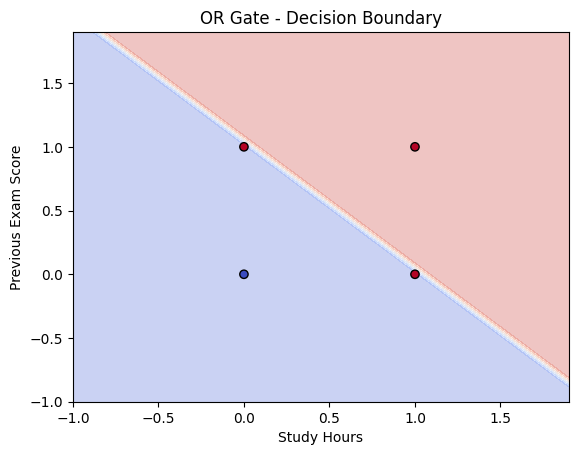

In [75]:
# Logic Gates Datasets
def logic_gate_data(gate_type):
    if gate_type == "AND":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 0, 0, 1])
    elif gate_type == "OR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 1, 1, 1])
    return X, y

# Visualizing logic gates
for gate in ["AND", "OR"]:
    X_gate, y_gate = logic_gate_data(gate)
    perceptron.fit(X_gate, y_gate)
    plot_decision_boundary(X_gate, y_gate, perceptron, f"{gate} Gate - Decision Boundary")